In [2]:
import sys
#sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
X_train = np.load('X_train.npy', mmap_mode='r')

In [4]:
x_tr = X_train[:100, :,:,:]


In [16]:
img_size = 128
X_blurred = [cv2.GaussianBlur(x, (3,3), 0) for x in x_tr]
X_resize = [cv2.resize(x, (img_size, img_size)) for x in X_blurred]

In [ ]:

X_test = np.load('X_test.npy', mmap_mode='r')


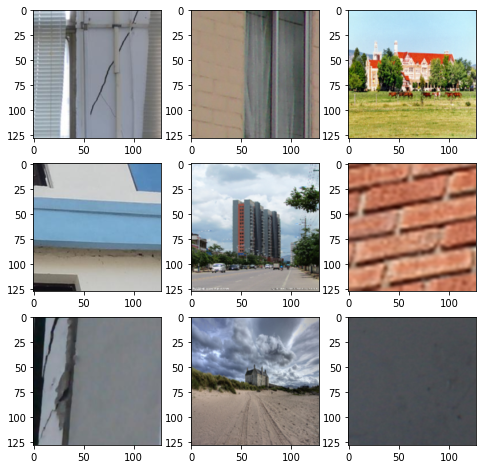

In [18]:
# X_test.shape # (4356, 224, 224, 3)
data = X_resize

fig = plt.figure(figsize=(8,8))
columns = 3
rows = 3
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    img = Image.fromarray(data[i], 'RGB')
    plt.imshow(img)

plt.show()

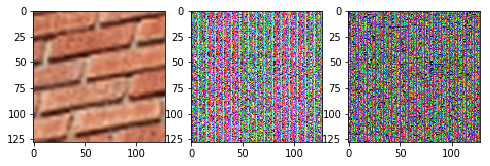

In [32]:
test_img = data[6]
#test_img_normalized = (test_img - test_img.mean()) / test_img.std()
norm = np.zeros(test_img.shape)
norm = cv2.normalize(test_img_normalized, norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

fig = plt.figure(figsize=(8,8))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
img = Image.fromarray(test_img, 'RGB')
plt.imshow(img)

fig.add_subplot(rows, columns, 2)
img = Image.fromarray(test_img_normalized, 'RGB')
plt.imshow(img)


fig.add_subplot(rows, columns, 3)
img = Image.fromarray(norm, 'RGB')
plt.imshow(img)




In [63]:
def show_imgs(img_list, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    rows = 1
    columns = len(img_list)
    for i in range(1, columns*rows + 1):
        fig.add_subplot(rows, columns, i)
        img = Image.fromarray(img_list[i-1], 'RGB')
        plt.imshow(img)

    plt.show()



In [59]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

ValueError: not enough image data

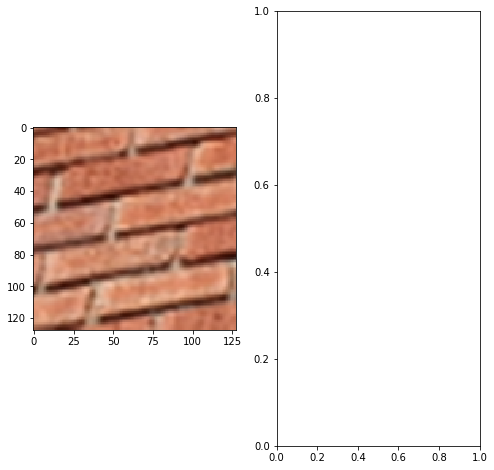

ValueError: not enough image data

In [64]:
#edges = cv2.Canny(test_img, 3, 4)
edges = auto_canny(test_img)
show_imgs([test_img, edges])
